**INSTALLING GENERAL LIBRARIES**

In [26]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras
%pip install nltk
%pip install gensim
%pip install contractions
%pip install spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
from keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from string import digits
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
import re
import contractions
import unicodedata
import string
from nltk.corpus import indian
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import unicodedata
from keras.models import Sequential,Model
from keras.layers import Input,Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import spacy
import contractions
from nltk.corpus import stopwords
import numpy as np # linear algebra
import pandas as pd
import nltk
nltk.download('punkt')


  Using cached numpy-2.1.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp310-cp310-macosx_14_0_arm64.whl (5.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's

[nltk_data] Downloading package punkt to /Users/sankalp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Reading Data using Pandas**

In [36]:
data=pd.read_csv('translate.csv')
data.head()

,English,Hindi
0,Help!,बचाओ!
1,Jump.,उछलो.
2,Jump.,कूदो.
3,Jump.,छलांग.
4,Hello!,नमस्ते।


In [37]:
data.sample(5)

,English,Hindi
8114,A nation on permanent vigil is certainly not a...,सतत सतर्क राष्ट्र दरासल भारतीय चरित्र में शामि...
125886,You can help your child 's teacher .,आप अपने बच्चे की शिक्षक की मदद कर सकते हैं .
63839,Music,संगीत
63104,Hanuman set sailed towards Lanka|,हनुमान ने लंका की ओर प्रस्थान किया।
71907,Ramayana Effect on Various cultures and civili...,विवध संस्कृतियों एवं सभ्यताओं पर रामायण का प्र...


Data Exploration

In [38]:
data.isnull().sum()

English      2
Hindi      312
dtype: int64

In [39]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  2788


In [40]:
data.drop_duplicates(inplace = True)

In [41]:
data.dropna(inplace=True)

In [42]:
data['English'] = data['English'].str.lower()

**Data Preprocessing**

In [43]:
def remove_html(text):
    if isinstance(text,str):
        
        pattern = re.compile('<.*?>')
        return pattern.sub(r'',text)
    else:
        return text

data['English'] = data['English'].apply(remove_html)

In [44]:
def remove_url(text):
    if isinstance(text,str):
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'',text)
    else:
        return
data['English'] = data['English'].apply(remove_url)
data['Hindi'] = data['Hindi'].apply(remove_url)

In [46]:
def preprocess_text(text, language='english'):
    if not isinstance(text, str):
        return text
    
    if language == 'english':
        pattern = re.compile(r'[^a-zA-Z0-9\s]')
        return pattern.sub(r'', text)
    elif language == 'hindi':
        pattern = re.compile(r'[^\u0900-\u097F\s]')
        return pattern.sub(r'', text)
    else:
        raise ValueError("Unsupported Language, Supported languages are 'english' and 'hindi'")
        
data['English'] = data['English'].apply(lambda x: preprocess_text(x, language='english'))
data['Hindi'] = data['Hindi'].apply(lambda x: preprocess_text(x, language='hindi'))

In [45]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

data['English'] = data['English'].apply(expand_contractions)

In [49]:
data.shape

(127375, 2)

In [51]:
# Add <start> and <end> tokens to Hindi sentences
data['Hindi'] = ['<start> ' + sentence + ' <end>' for sentence in data['Hindi']]

In [54]:
data = data[data['English'].str.len() <= 100]

In [55]:
data.shape

(49908, 2)

**Tokenize Data**

In [56]:
tok = Tokenizer()
tok.fit_on_texts(data['English'])
tok_hindi = Tokenizer()
tok_hindi.fit_on_texts(data['Hindi'])
len(tok.word_index),len(tok_hindi.word_index)
(22870, 24779)
len(tok.word_index),len(tok_hindi.word_index)
(22870, 24779)
tok.document_count

49908

In [57]:
data['English'] = tok.texts_to_sequences(data['English'])
data['Hindi'] = tok_hindi.texts_to_sequences(data['Hindi'])

In [58]:
data

,English,Hindi
0,[147],"[1, 12932, 2]"
1,[2825],"[1, 12933, 2]"
2,[2825],"[1, 12934, 2]"
3,[2825],"[1, 4544, 2]"
4,[3793],"[1, 9629, 2]"
...,...,...
130461,"[61, 50, 11, 14, 6, 930, 157]","[1, 98, 48, 21, 11, 1820, 164, 9, 2]"
130462,"[1, 22626, 14, 10028, 26, 4576]","[1, 107, 2915, 9380, 17, 3258, 8, 3242, 45, 51..."
130464,"[4, 47, 13, 95, 10, 5, 251, 55, 454]","[1, 86, 22, 181, 9, 14, 13, 1276, 849, 2]"
130466,"[360, 45, 16, 218, 345]","[1, 1115, 37, 34, 1394, 15, 7, 16, 2]"


In [59]:
def calculate_max_sequence_length(eng,hindi):
    max_length_combined = max(max(len(seq) for seq in eng), max(len(seq) for seq in hindi))

    return max_length_combined

max_length_combined = calculate_max_sequence_length(data['English'],data['Hindi'])
max_length_combined

260

In [60]:
for num in data['English'][0]:
    print(num, end=' ')

147 

In [61]:
for num in data['English'][0]:
    word = tok.index_word.get(num, 'UNK')  
    print(word, end=' ')

help 

In [62]:
for num in data['Hindi'][0]:
    word = tok_hindi.index_word.get(num)
    print(word,end = " ")

start बचाओ end 

In [63]:
hindi = data['Hindi']
english = data['English']


In [64]:
x = pad_sequences(english,maxlen = max_length_combined,padding = 'post')
y = pad_sequences(hindi,maxlen = max_length_combined,padding = 'post')


In [65]:
x

array([[ 147,    0,    0, ...,    0,    0,    0],
       [2825,    0,    0, ...,    0,    0,    0],
       [2825,    0,    0, ...,    0,    0,    0],
       ...,
       [   4,   47,   13, ...,    0,    0,    0],
       [ 360,   45,   16, ...,    0,    0,    0],
       [   2,  188,    9, ...,    0,    0,    0]],
      shape=(49908, 260), dtype=int32)

In [66]:
y

array([[    1, 12932,     2, ...,     0,     0,     0],
       [    1, 12933,     2, ...,     0,     0,     0],
       [    1, 12934,     2, ...,     0,     0,     0],
       ...,
       [    1,    86,    22, ...,     0,     0,     0],
       [    1,  1115,    37, ...,     0,     0,     0],
       [    1,     6,    41, ...,     0,     0,     0]],
      shape=(49908, 260), dtype=int32)

Making Train Test Split for data training and validation

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (39926, 260)
Shape of x_test: (9982, 260)
Shape of y_train: (39926, 260)
Shape of y_test: (9982, 260)


**Endcoder Decoder Model Without Attention**

In [69]:
max_length_input = x_train.shape[1]
max_length_output = y_train.shape[1]
input_vocab_size = len(tok.word_index) + 1
output_vocab_size = len(tok_hindi.word_index) + 1

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 260, 260)  │  5,883,280 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 260, 260)  │  6,373,120 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 156),     │    260,208 │ embedding[0][0]   │
│                     │ (None, 156),      │            │                   │
│                     │ (None, 156)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_1[0][0… │
│                     │ 156), (None,      │            │ lstm[0][1],       │
│                     │ 156), (None,      │            │ lstm[0][2]        │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 260,       │  3,848,384 │ lstm_1[0][0]      │
│                     │ 24512)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,625,200 (63.42 MB)

 Trainable params: 16,625,200 (63.42 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],  
)

Epoch 1/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3260s 3s/step - accuracy: 0.9665 - loss: 0.9091 - val_accuracy: 0.9835 - val_loss: 0.1332
Epoch 2/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3324s 3s/step - accuracy: 0.9853 - loss: 0.1208 - val_accuracy: 0.9895 - val_loss: 0.0911
Epoch 3/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3019s 2s/step - accuracy: 0.9905 - loss: 0.0822 - val_accuracy: 0.9929 - val_loss: 0.0657
Epoch 4/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3246s 3s/step - accuracy: 0.9934 - loss: 0.0585 - val_accuracy: 0.9948 - val_loss: 0.0497
Epoch 5/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 13195s 11s/step - accuracy: 0.9953 - loss: 0.0418 - val_accuracy: 0.9960 - val_loss: 0.0388


**Visualizing obtained data**

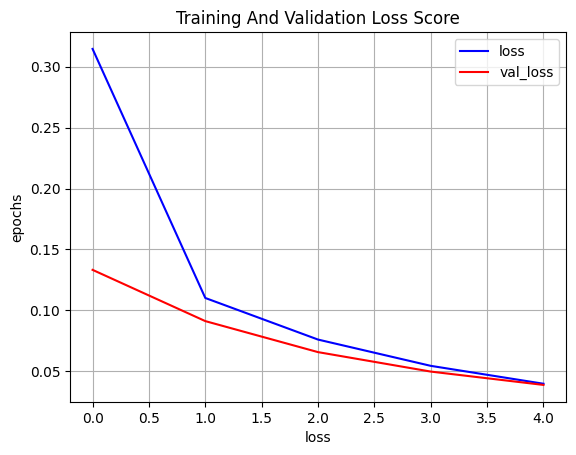

In [71]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

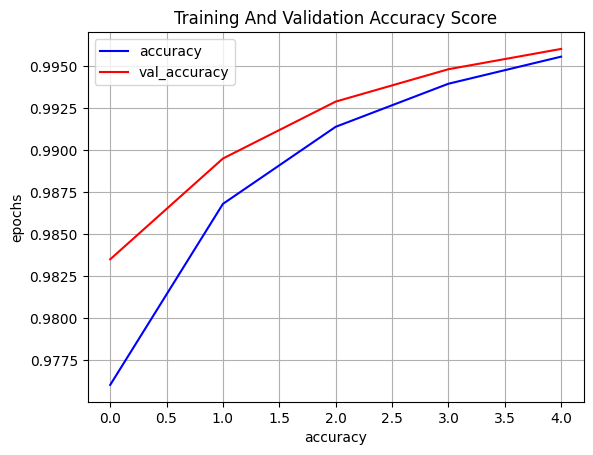

In [72]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [80]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Shape of predictions: (10, 260, 24512)
Shape of predicted_tokens: (10, 260)
English sentence 1: addict tor to religion
Predicted Hindi translation 1: धार्मिक कट्टरपंथी

English sentence 2: how is it going
Predicted Hindi translation 2: कैसा चल रहा है

English sentence 3: remember most young people never try solvents
Predicted Hindi translation 3: याद भुला अधिकतर युवा लोग ख़ुद को सैन का कभी प्रयत्न नहीं करते हैं

English sentence 4: there was unanimity in the panel
Predicted Hindi translation 4: पैनल में पूरी तरह एक राय थी

English sentence 5: parliament house of india
Predicted Hindi translation 5: भारत का संसद भवन।

English sentence 6: the butterfly is well known for its migrations
Predicted Hindi translation 6: यह भारतीयों अपने शिव के लिए प्रसिद्ध है

English sentence 7: children affected after the first dose of mmr
Predicted Hindi translation 7: बच्चे जो फ़कीर के पहले रोगी से गुजर हुए है

English sentence 8: fast forward 11 years later i am a 25ye

In [86]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize

# Download punkt tokenizer model (run only once)
nltk.download('punkt')

# Initialize lists for references and hypotheses
references = []
hypotheses = []

# Loop through predictions and actual outputs
for i in range(num_samples):
    # Get reference Hindi sentence from ground truth
    reference_sentence = [
        rev_tok_hindi.get(token, '<unk>') 
        for token in y_test_padded_subset[i] 
        if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]
    ]
    ref_tokens = [['<unk>' if word is None else word for word in ' '.join(reference_sentence).split()]]
    hyp_tokens = predicted_sentences[i].split()


    # Append to lists
    references.append(ref_tokens)
    hypotheses.append(hyp_tokens)

# Calculate BLEU score with smoothing
smoothie = SmoothingFunction().method4
bleu_score = corpus_bleu(references, hypotheses, smoothing_function=smoothie)

print(f"\n✅ Corpus BLEU score: {bleu_score:.4f}")



✅ Corpus BLEU score: 0.6459


[nltk_data] Downloading package punkt to /Users/sankalp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Encoder Decoder Model with Attention**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Attention, Concatenate
from tensorflow.keras.models import Model

# Define Encoder model
encoder_inputs = Input(shape=(max_length_input,))
encoder_embedding = Embedding(input_dim=input_vocab_size, output_dim=260)(encoder_inputs)
encoder_lstm = LSTM(156, return_sequences=True, return_state=True)  # Ensure return_sequences=True
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Define Decoder model
decoder_inputs = Input(shape=(max_length_output,))
decoder_embedding = Embedding(input_dim=output_vocab_size, output_dim=260)(decoder_inputs)
decoder_lstm = LSTM(156, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Attention Layer
attention = Attention()([decoder_outputs, encoder_outputs])

# Concatenate attention output with decoder outputs
decoder_concat_input = Concatenate(axis=-1)([decoder_outputs, attention])

# Dense Layer for output prediction
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the full Encoder-Decoder model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 260)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 260, 260)  │  5,883,280 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 260, 260)  │  6,373,120 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_2[0][0] │
│                     │ 156), (None,      │            │                   │
│                     │ 156), (None,      │            │                   │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 260,      │    260,208 │ embedding_3[0][0… │
│                     │ 156), (None,      │            │ lstm_2[0][1],     │
│                     │ 156), (None,      │            │ lstm_2[0][2]      │
│                     │ 156)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 260, 156)  │          0 │ lstm_3[0][0],     │
│ (Attention)         │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 260, 312)  │          0 │ lstm_3[0][0],     │
│ (Concatenate)       │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 260,       │  7,672,256 │ concatenate[0][0] │
│                     │ 24512)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,449,072 (78.01 MB)

 Trainable params: 20,449,072 (78.01 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)  # Updated filepath

# Train the model with callbacks
history = model.fit(
    x=[x_train, y_train],# Exclude last token from decoder input
    y=y_train,   # Exclude first token from decoder target
    batch_size=32,
    epochs=5,
    validation_data=([x_test, y_test], y_test),
    callbacks=[early_stopping, model_checkpoint],  
)

Epoch 1/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 30350s 24s/step - accuracy: 0.9685 - loss: 0.6455 - val_accuracy: 0.9855 - val_loss: 0.1211
Epoch 2/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 4318s 3s/step - accuracy: 0.9877 - loss: 0.1052 - val_accuracy: 0.9920 - val_loss: 0.0725
Epoch 3/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 4274s 3s/step - accuracy: 0.9929 - loss: 0.0628 - val_accuracy: 0.9947 - val_loss: 0.0499
Epoch 4/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 8784s 7s/step - accuracy: 0.9952 - loss: 0.0416 - val_accuracy: 0.9961 - val_loss: 0.0381
Epoch 5/5
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 18606s 15s/step - accuracy: 0.9966 - loss: 0.0290 - val_accuracy: 0.9970 - val_loss: 0.0308


**Visualizing obtained data**

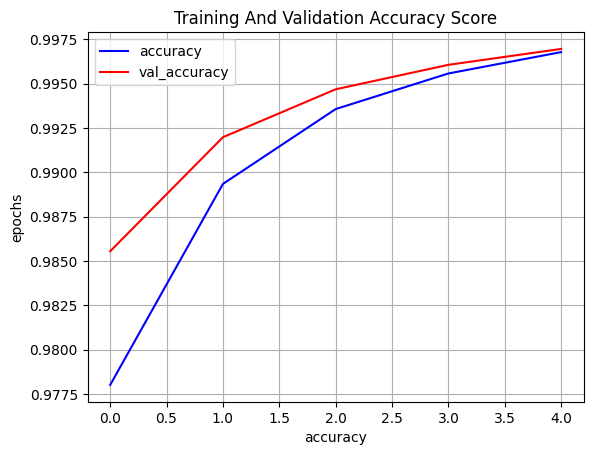

In [75]:
plt.plot(history.history['accuracy'],color = 'blue',label = 'accuracy')
plt.plot(history.history['val_accuracy'],color = 'red',label = 'val_accuracy')
plt.title("Training And Validation Accuracy Score")
plt.xlabel("accuracy")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

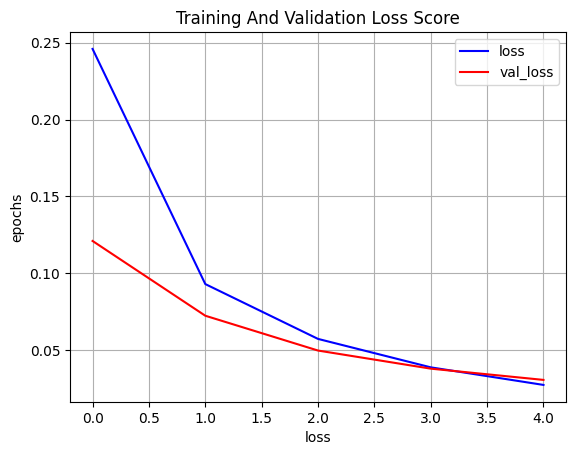

In [76]:
plt.plot(history.history['loss'],color = 'blue',label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label = 'val_loss')
plt.title("Training And Validation Loss Score")
plt.xlabel("loss")
plt.ylabel("epochs")
plt.grid()
plt.legend()
plt.show()

In [78]:
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Reverse token dictionaries
rev_tok_hindi = {idx: word for word, idx in tok_hindi.word_index.items()}

# Select a subset of test data
num_samples = 10
x_test_subset = x_test[:num_samples]
y_test_padded_subset = y_test[:num_samples]

# Predict
predictions = model.predict([x_test_subset, y_test_padded_subset], batch_size=16)
print('Shape of predictions:', predictions.shape)

# Convert predictions to token indices
predicted_tokens_np = np.argmax(predictions, axis=-1)
print('Shape of predicted_tokens:', predicted_tokens_np.shape)

# Map indices to tokens and remove 'start' and 'end' tokens
predicted_sentences = []
for sample in predicted_tokens_np:
    sentence = ' '.join([rev_tok_hindi.get(token, '<unknown>') for token in sample if token != 0 and token not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]])  # Exclude padding, 'start', and 'end' tokens
    predicted_sentences.append(sentence)

# Reverse token dictionary for English (assuming you have `tok_english` for English tokens)
rev_tok_english = {idx: word for word, idx in tok.word_index.items()}

# Map the English test inputs to their corresponding sentences
english_sentences = []
for sample in x_test_subset:
    sentence = ' '.join([rev_tok_english.get(token, '<unknown>') for token in sample if token != 0])  # Exclude padding token
    english_sentences.append(sentence)

# Print English sentence followed by predicted Hindi sentence
for idx, (eng_sentence, hin_sentence) in enumerate(zip(english_sentences, predicted_sentences)):
    print(f'English sentence {idx + 1}: {eng_sentence}')
    print(f'Predicted Hindi translation {idx + 1}: {hin_sentence}\n')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Shape of predictions: (10, 260, 24512)
Shape of predicted_tokens: (10, 260)
English sentence 1: addict tor to religion
Predicted Hindi translation 1: धार्मिक कट्टरपंथी

English sentence 2: how is it going
Predicted Hindi translation 2: कैसा चल रहा है

English sentence 3: remember most young people never try solvents
Predicted Hindi translation 3: याद भुला अधिकतर युवा लोग ख़ुद को सैन का कभी प्रयत्न नहीं करते हैं

English sentence 4: there was unanimity in the panel
Predicted Hindi translation 4: पैनल में पूरी तरह एक राय थी

English sentence 5: parliament house of india
Predicted Hindi translation 5: भारत का संसद भवन।

English sentence 6: the butterfly is well known for its migrations
Predicted Hindi translation 6: यह भारतीयों अपने शिव के लिए प्रसिद्ध है

English sentence 7: children affected after the first dose of mmr
Predicted Hindi translation 7: बच्चे जो फ़कीर के पहले रोगी से गुजर हुए है

English sentence 8: fast forward 11 years later i am a 25ye

In [79]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
import numpy as np
smoothie = SmoothingFunction().method4


references = []
hypotheses = []

for i in range(len(y_test_padded_subset)):

    ref_tokens = [word for word in y_test[i] if word != 0 and word not in [tok_hindi.word_index.get('start'), tok_hindi.word_index.get('end')]]
    ref_words = [rev_tok_hindi.get(token, '<unk>') for token in ref_tokens]
    references.append([ref_words])  


    hyp_sentence = predicted_sentences[i].split()
    hypotheses.append(hyp_sentence)


bleu_score = corpus_bleu(references, hypotheses, smoothing_function=smoothie)
print(f"Corpus BLEU Score: {bleu_score * 100:.2f}")


Corpus BLEU Score: 64.59
